# Evaluation of sixth grade of primary education

## Context
The dataset *educacio.csv* contains the results obtained by sixth grade students in the assessment of basic skills and knowledge at the end of primary education since 2018.

We want to analyze this data set to provide information about the profile of 6th grade students and their annual evolution.

**Description of the columns**
* ANY: year in which the assessment took place.
* PCAT: overall weighted score of linguistic competence in the Catalan language.
* PCAST: weighted global score of linguistic competence in the Spanish language.
* PMAT: overall weighted math proficiency score.
* PANG: weighted global score of linguistic competence in the English language.
* PMED: global score of the competence associated with the area of knowledge of the natural environment.
* GENERE: gender of the student taking the assessment.
* ANY_NAIXEMENT: year of birth of the student taking the assessment.
* AREA_TERRITORIAL: region where the center of the student appearing for the assessment is located.
* NATURALESA: determines whether the student's center is public or private.
* HABITAT: municipalities by population sections.

### Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Load the datasets 

In [2]:
data_frame = pd.read_csv('educacio.csv')

## 1. Students analysis

1\.1. Show in different graphs the number of students per year, per year and nature, per year and gender, and per year and habitat.<br>

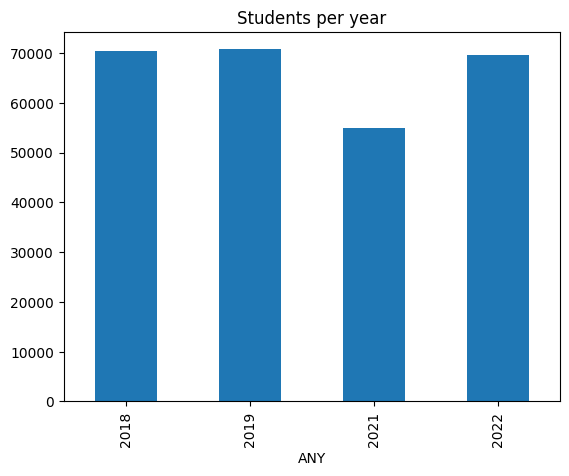

In [3]:
# 1.1.1 Students per year

students_per_year = data_frame.groupby('ANY').size()

students_per_year.plot(kind='bar', title='Students per year')
plt.show()

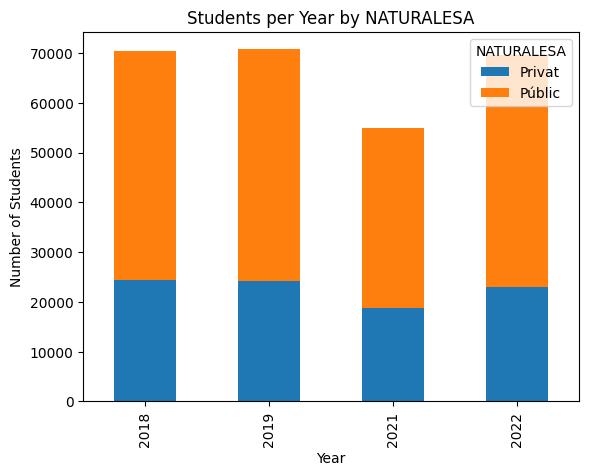

In [4]:
# 1.1.2 Students per year and privte or public

students_per_year_and_nature = data_frame.groupby(['ANY', 'NATURALESA']).size().unstack(fill_value=0)

students_per_year_and_nature.plot(kind='bar', stacked=True)
plt.title('Students per Year by NATURALESA')
plt.xlabel('Year')
plt.ylabel('Number of Students')
plt.legend(title='NATURALESA')
plt.show()

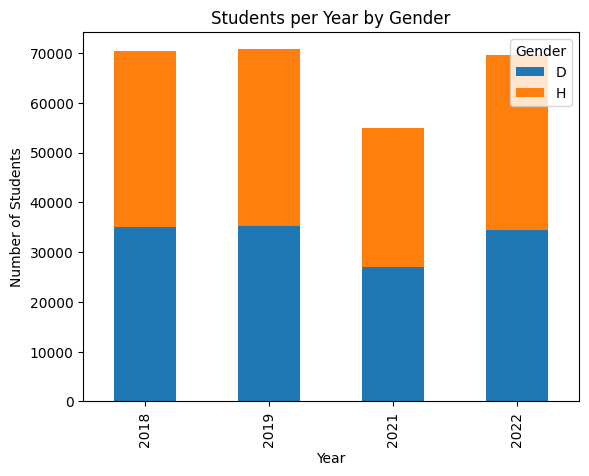

In [5]:
# 1.1.3 Students per year and gender

students_per_year_and_gender = data_frame.groupby(['ANY', 'GENERE']).size().unstack(fill_value=0)

students_per_year_and_gender.plot(kind='bar', stacked=True)
plt.title('Students per Year by Gender')
plt.xlabel('Year')
plt.ylabel('Number of Students')
plt.legend(title='Gender')
plt.show()

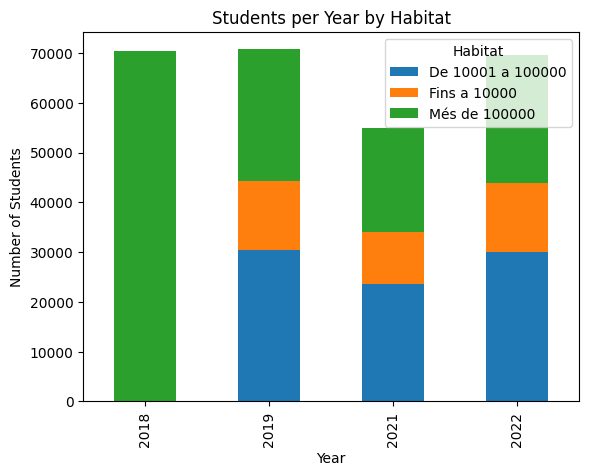

In [6]:
# 1.1.4 Students per year and habitat

students_per_year_and_habitat = data_frame.groupby(['ANY', 'HABITAT']).size().unstack(fill_value=0)

students_per_year_and_habitat.plot(kind='bar', stacked=True)
plt.title('Students per Year by Habitat')
plt.xlabel('Year')
plt.ylabel('Number of Students')
plt.legend(title='Habitat')
plt.show()

1\.2. Discuss your conclusions.

From the obtained above graphs we can make certain conclusions about the dataset given to us, as we were able to clearly visualise it. 

1.1.1 --> We can see that there has been a drop in students enrolled in 2021. All other years 2018. 2019, and 2022, tend to have more or less the same about of students enrolled (approx 70000), while in 2021 there are approx 55000 students. 

1.1.2 --> We can see that throughout all years there is an approx 35%/65% distribution between private and public education accordingly. 

1.1.3 --> Gender distributions seem to be nearly equal between males and females (50/50) throughout all of the sample years.

1.1.4 --> In 2018 we see that all of the data comes from large habitats (where the population is > 100000), so it should be considered in case there is some comparison happening based on this factor. In other years we see the appearance of all habitat types. 2019, 2021, and 2022 seem to have an approx distribution of the students of 35%/21%/43% between h>100000, h<10000 and 10000<h<100000. 

## 2. Analysis of the grade average

2\.1. Calculate the average of the 5 grades (PCAST, PCAT, PANG, PMAT and PMED) and add them to the data.<br>

In [7]:
# 2.1 Avg of 5 grades

data_frame['Average_Grade'] = data_frame[['PCAST', 'PCAT', 'PANG', 'PMAT', 'PMED']].mean(axis=1)

print(data_frame[['PCAST', 'PCAT', 'PANG', 'PMAT', 'PMED', 'Average_Grade']].head()) #gets some sampling

   PCAST   PCAT   PANG   PMAT   PMED  Average_Grade
0  70.63  70.08  32.92  79.61  66.81         64.010
1  56.11  46.74  73.75  31.28  28.61         47.298
2  91.24  84.07  97.50  91.00  76.81         88.124
3  91.89  80.66  87.92  78.11  79.31         83.578
4  80.86  71.04  93.33  84.61  71.39         80.246


2\.2. Display a histogram of the average of the 5 grades you computed.<br>

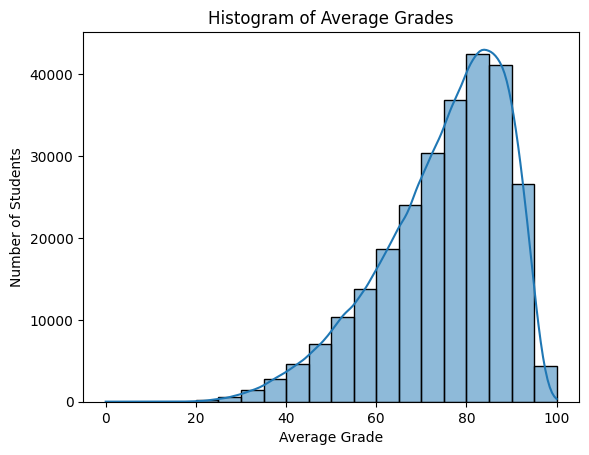

In [8]:
# 2.2 Histogram

sns.histplot(data_frame['Average_Grade'], kde=True, bins=20)
plt.title('Histogram of Average Grades')
plt.xlabel('Average Grade')
plt.ylabel('Number of Students')
plt.show()

2\.3. Discuss your conclusions.

Here are some of the conclusions we can make based of the historgam: 

 - We can see a peak around the grade of 70-80, suggesting that the average grade for most students falls within this range. 
 - The graph has a right shift, meaning that there are more studetns who score higher grades than those who score lower ones. 

Looking at those results we may draw a conclusion that the educational system follwed is successful, as there are way more students who pass, than those who fail

## 3. Analyses of the quartiles of the grades

### prepare the data

In [9]:
grades_columns = ['PCAST', 'PCAT', 'PANG', 'PMAT', 'PMED', 'Average_Grade']
df_melted = data_frame.melt(id_vars=['ANY', 'GENERE', 'NATURALESA', 'HABITAT', 'AREA_TERRITORIAL'], value_vars=grades_columns, var_name='Test', value_name='Score')

3\.1. Show the boxplots of the 5 tests and the average per year.<br>

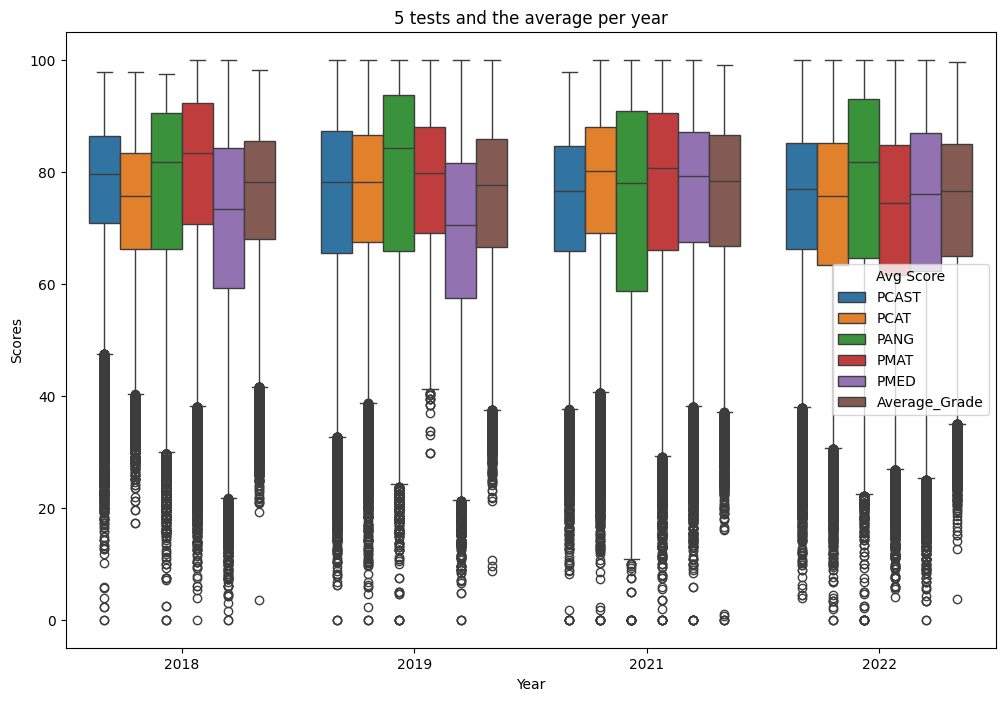

In [10]:
# 3.1 
plt.figure(figsize=(12, 8))
sns.boxplot(x='ANY', y='Score', hue='Test', data=df_melted)
plt.title('5 tests and the average per year')
plt.xlabel('Year')
plt.ylabel('Scores')
plt.legend(title='Avg Score')
plt.show()

3\.2. Show the boxplots of the 5 tests and the average by gender.<br>

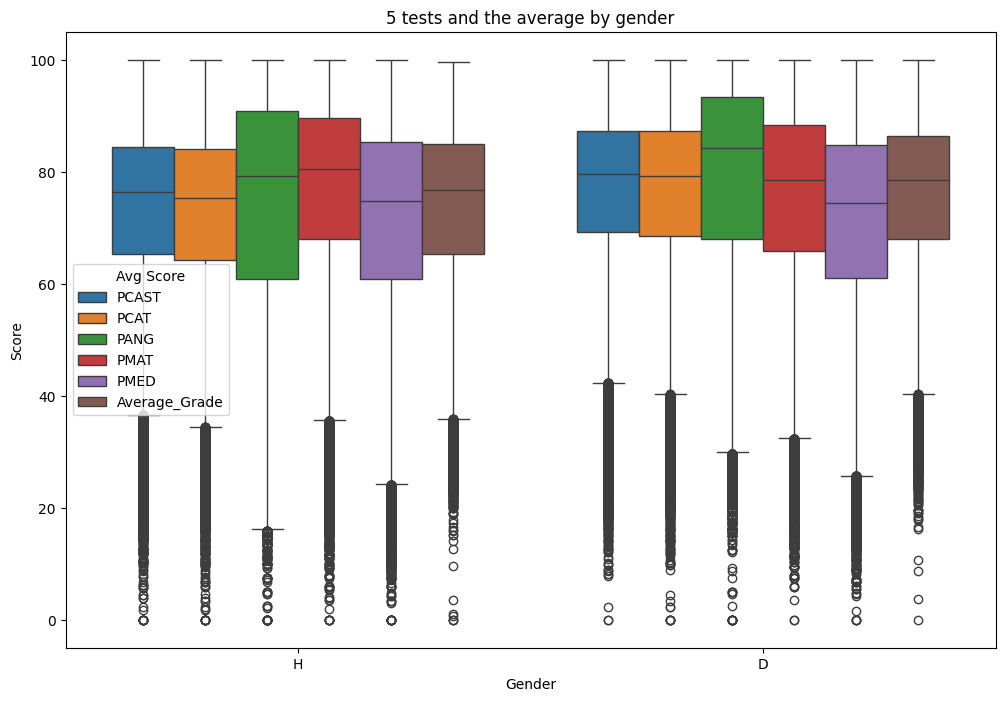

In [11]:
#3.2 
plt.figure(figsize=(12, 8))
sns.boxplot(x='GENERE', y='Score', hue='Test', data=df_melted)
plt.title('5 tests and the average by gender')
plt.xlabel('Gender')
plt.ylabel('Score')
plt.legend(title='Avg Score')
plt.show()

3\.3. Show the boxplots of the 5 tests and the average by NATURALESA (public or private).<br>

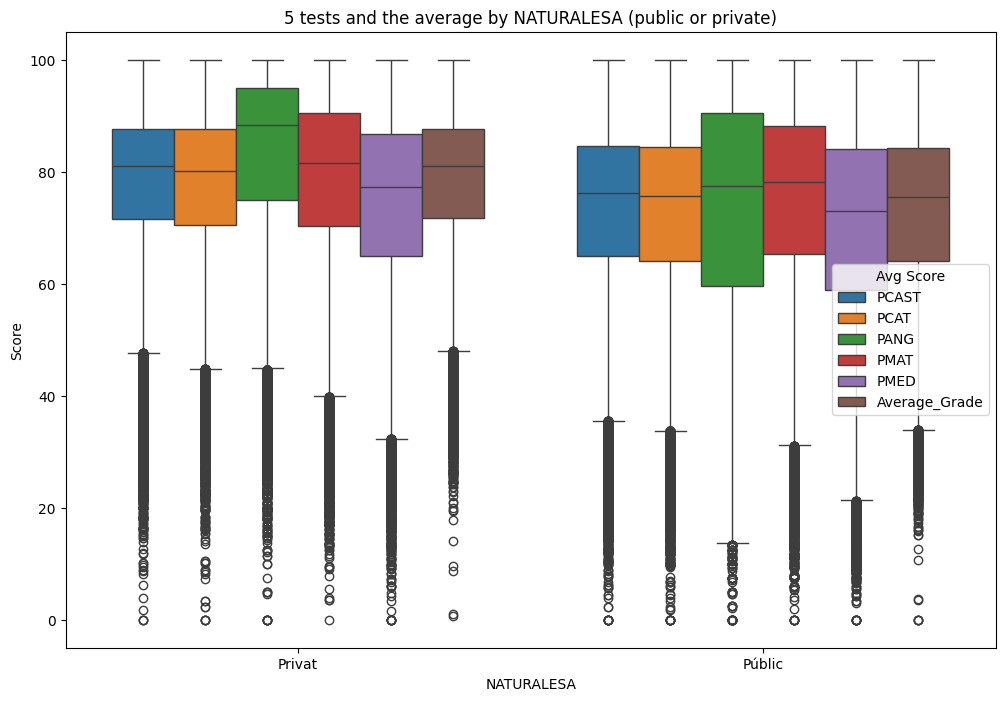

In [12]:
#3.3
plt.figure(figsize=(12, 8))
sns.boxplot(x='NATURALESA', y='Score', hue='Test', data=df_melted)
plt.title('5 tests and the average by NATURALESA (public or private)')
plt.xlabel('NATURALESA')
plt.ylabel('Score')
plt.legend(title='Avg Score')
plt.show()


3\.4. Show the boxplots of the 5 tests and the average per municipality.<br>

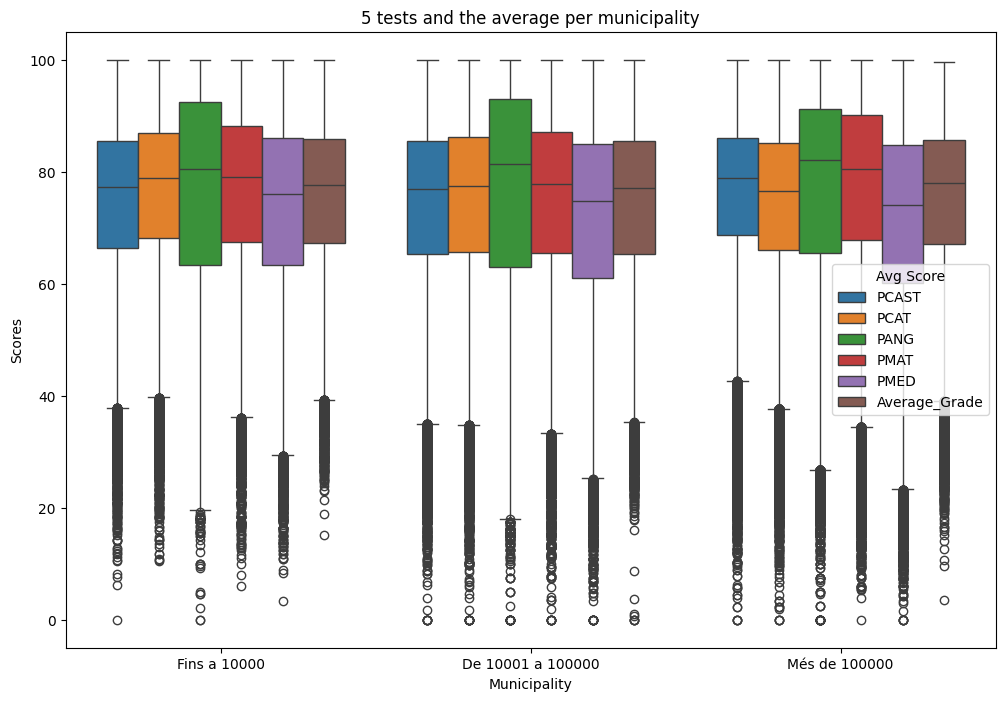

In [13]:
# 3.4

plt.figure(figsize=(12, 8))
sns.boxplot(x='HABITAT', y='Score', hue='Test', data=df_melted)
plt.title('5 tests and the average per municipality')
plt.xlabel('Municipality')
plt.ylabel('Scores')
plt.legend(title='Avg Score', loc='right')
plt.show()

3\.5. Show the boxplots of the 5 tests and the average per region.<br>

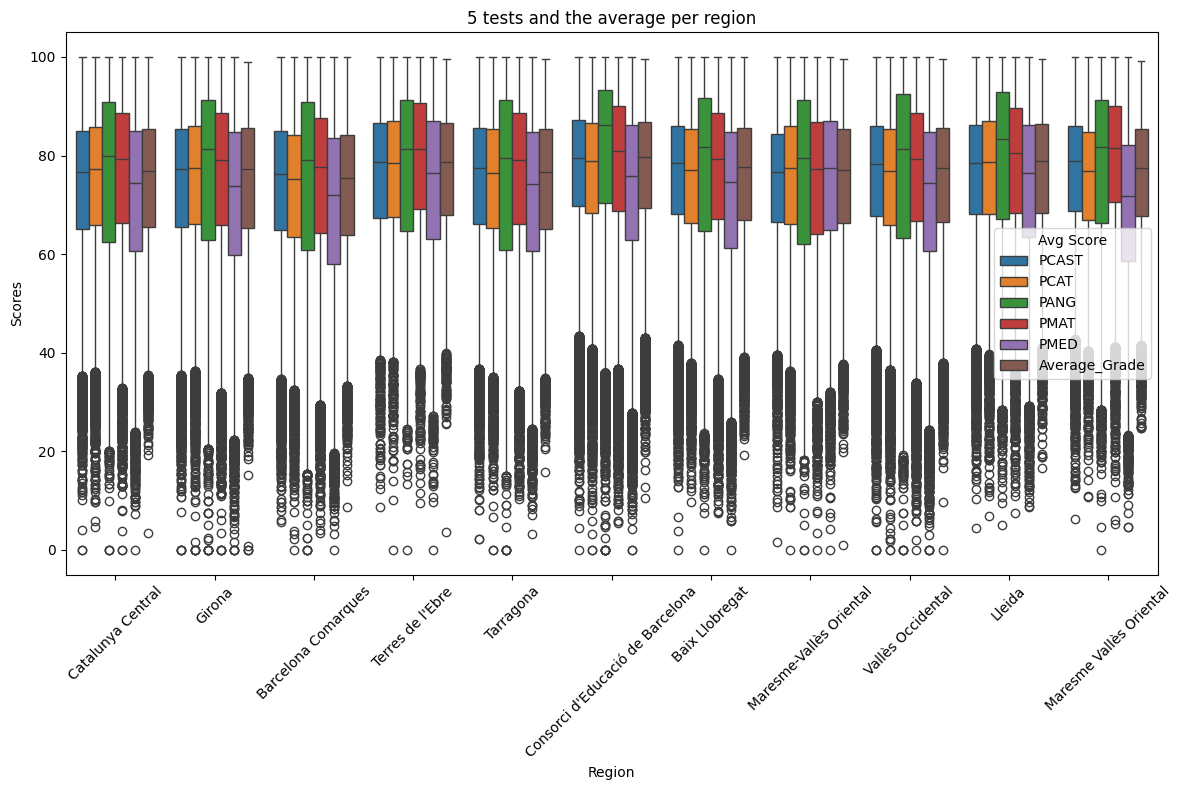

In [14]:
#3.5
plt.figure(figsize=(12, 8))
sns.boxplot(x='AREA_TERRITORIAL', y='Score', hue='Test', data=df_melted)
plt.title('5 tests and the average per region')
plt.xlabel('Region')
plt.ylabel('Scores')
plt.legend(title='Avg Score', loc='right')
plt.xticks(rotation=45)
plt.tight_layout() 
plt.show()

3\.6. Discuss the conclusions you have drawn.

3.1 --> The boxplots across different years show a consistent range of scores for each test and the average grade. We can see that in 2021 and 2022 the overall score of the competence associated with the natural environment's knowledge has improved compared with 2018 and 2019 results. We can also see that in 2021 there has been a little drop in the weighted overall score for English, however it recuperated fast following teh next year. 

3.2 --> The scores distributed by gender show us that girls temnd to do a little bettwer than boy when it comes to English, however boys tend to get a little bit better grades in Mathematics. However, the average grade does not seem to be dependent on the gender, as it is pretty much the same.

3.3 --> When comparing private and public education, we can see that students that are attending private institutions tend to have higher overall grades compared to the pubic ones. 

3.4 --> The average grades reamin practically the same acroos all municipalities. However we can see that largly populated places tend to score a little bit better in Mathematics, English and Castellano, but at the same time a little bit worse in natural environment's knowledge. Acroos the little and middle populated places the results seems to be quite equal. However, accoring to task 1 we can see that Larger municipalities may have more resources and thus a tighter grouping of scores, whereas smaller municipalities might have a wider range of performance.

3.5 --> There are numerous outliers in almost every region and test, which could represent either students who are underperforming or excelling compared to their peers. The median scores for each test and the average score are relatively consistent across regions



## 4. Correlation analysis

4\.1. Display the correlation matrix of the variables. Convert to numeric the ones you think are necessary (justify it).<br>

4.1.1 Data manipulations

In [ ]:
data_frame['GENERE_numeric'] = data_frame['GENERE'].map({'H': 1, 'D': 0})
data_frame['NATURALESA_numeric'] = data_frame['NATURALESA'].map({'Públic': 1, 'Privat': 0})
data_frame['HABITAT_numeric'] = data_frame['HABITAT'].map({'Més de 100000' : 2, 'Fins a 10000': 1, 'De 10001 a 100000': 0})

data_frame = pd.get_dummies(data_frame, columns=['AREA_TERRITORIAL'])

Justifications: 
- GENERE_numeric: Gender was converted to numeric values to allow for inclusion in the correlation matrix. This will allow us to make an examination of potential differences in scores related to gender.
- NATURALESA_numeric: The nature of the educational center (public or private) is also a binary category. Now we can analyze how the type of educational institution correlates with academic performance and other variables.
- HABITAT_numeric: Habitat, categorized by population groups. The reason for this encoding is to see if there's any linear relationship between the size of the municipality and the students' scores.

4.1.2 Matrix creation

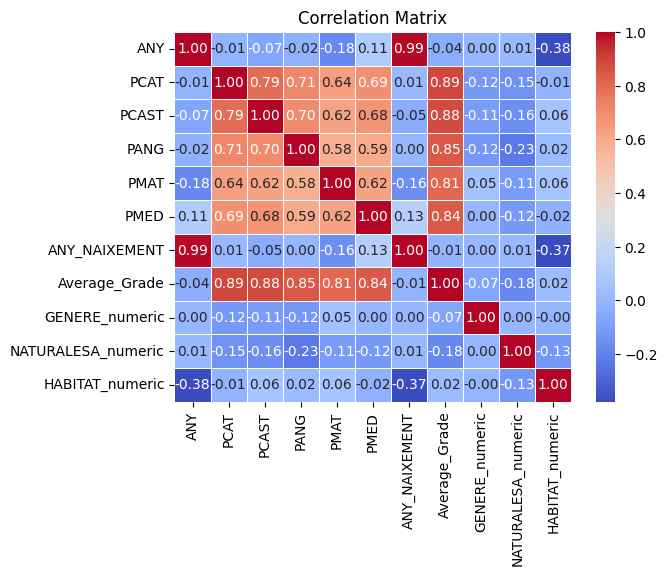

In [15]:

numeric_columns = data_frame.select_dtypes(include=[np.number]).columns.tolist()
correlation_matrix = data_frame[numeric_columns].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()


4\.2. Discuss you conclusions.

1) ANY and ANY_NAIXEMENT: There is a near-perfect positive correlation (0.99) between those.It is very expected as the years are directlycalculated from one another.
2) Academic Competences (PCAT, PCAST, PANG, PMAT, PMED): All of these scores are positively correlated with each other, ranging from moderate to high positive correlations (0.58 to 0.81). This suggests that students who score well in one academic area are likely to score well in others.
3) ANY and HABITAT_numeric: A moderate negative correlation of -0.38 suggests that there might be a connection between the year of evaluation and the grouping of municipalities by population. This could indicate changing demographics or policies affecting where students live over time.
4) Another obvious one is Average_Grade: There are strong positive correlations with the individual test scores (0.81 to 0.89), which is expected since the average grade is derived from these scores.
5) GENERE_numeric, NATURALESA_numeric, and HABITAT_numeric: These newly numeric variables show very low to no correlation with the academic scores and Average_Grade, indicating that gender, the nature of the student's center (public or private), and habitat type don't have strong linear relationships with academic performance as per this dataset.
6) ANY and PCAT, PCAST, PMAT: There are slight negative correlations ranging from -0.01 to -0.18, suggesting a very weak trend that as time goes by, students tensd to score lessin those subjects
7) PMAT and PMED: The correlation of 0.62 indicates that students who do well in mathematics also tend to do well in natural environment knowledge.


## 5. Additional analyses

5\.1. Add any additional analyses you deem appropriate.<br>
5\.2. Discuss you conclusions.

## 6. Identification of student types (OPTIONAL)

6\.1. Apply the clustering algorithm k-means on the grades of the 5 subjects. Analyse the results obtained with different numbers of clusters and choose the grouping that you consider most appropriate. Justify the answer. <br>

6\.2. About the chosen solution, explain what type of student belongs to each cluster group. You can use boxplots or histograms discriminating by the cluster identifier (you will have to add the cluster assigned to each row to the student table). 
To save the cluster assigned to each student in the data table, you can do (data is the dataframe that contains the students' data and kmeans the KMeans object):<br>
`dades['cluster'] = kmeans.labels_`